# Informação de Fisher

Seja $X$ uma amostra aleatória cuja distribuição depende de $\theta$ e tem valores em $(a,b) \subset \mathbb{R}$. Seja $f_n(x|\theta)$ a pdf conjunta de $X$. Assuma que $S = {x | f(x|\theta) > 0}$ é o mesmo para todo $\theta$. E $\lambda_n(x|\theta) = \log f_n(x|\theta)$ é duas vezes diferenciável em $\theta$.  A informação é: 

$$
I_n(\theta) = E_{\theta}\{[\lambda_n '(X|\theta)]^2\}
$$

Agora assuma que duas derivadas de $\int_S f_n(x|\theta)dx$ com respeito a $\theta$ podemos [inverter a ordem de integração e diferenciação](https://en.wikipedia.org/wiki/Leibniz_integral_rule#:~:text=General%20form%3A%20Differentiation%20under%20the%20integral%20sign,-Theorem.&text=That%20is%2C%20it%20is%20related,as%20the%20Leibniz%20integral%20rule.&text=the%20change%20of%20order%20of%20integration%20(integration%20under%20the%20integral,%3B%20i.e.%2C%20Fubini's%20theorem).). Então:

$$
I_n(\theta) = - E_{\theta}[\lambda_n ''(X|\theta)]
$$

## Teorema

$$I_n(\theta) = nI(\theta)$$

**Obs.:** Estamos tratando da informação de Fisher para o caso unidimensional. Para o caso em que temos $\Omega \subset \mathbb{R}^k$, a informação de Fisher será uma matriz de tamanho $k \times k$ onde

$$
I_{n,i,j} = Cov_{\theta}\left[\frac{\partial}{\partial \theta_i}\lambda_n'(X|\theta), \frac{\partial}{\partial \theta_j}\lambda_n'(X|\theta)\right]
$$

In [122]:
import numpy as np
from scipy.stats import norm
from scipy.misc import derivative
from scipy.optimize import curve_fit 

import matplotlib.pyplot as plt 
from seaborn import violinplot
import inspect

## Exemplo Construtivo

Vamos pensar num caso bem simples: amostra aleatória $X_1, ..., X_n \sim \text{Normal}(\mu, \sigma^2)$, onde o parâmetro $\sigma^2$ é conhecido e $\mu$ não.  

De forma direta, poderíamos perguntar qual a Informação de Fisher (ou Informação Diferencial) da amostra aleatória sobre o parâmetro desconhecido $\mu$. 

1. Vamos encontrar a distribuição conjunta:

$$f(x|\mu) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left[-\frac{1}{2}\frac{(x - \mu)^2}{\sigma^2}\right]$$

$$
\begin{split}
f_n(x|\mu) &= \prod_{i=1}^n f(x_i|\mu) = \frac{1}{(2\pi\sigma^2)^{n/2}}\exp\left[-\frac{1}{2\sigma^2}\sum_{i=1}^n (x_i - \mu)^2\right] \\ 
&= \frac{1}{(2\pi\sigma^2)^{n/2}}\exp\left[-\frac{1}{2\sigma^2}\sum_{i=1}^n (x_i^2 - 2x_i\mu + \mu^2)\right] \\
&= \frac{1}{(2\pi\sigma^2)^{n/2}}\exp\left[-\frac{1}{2\sigma^2}\left(\sum_{i=1}^n x_i^2 - 2n\bar{x}_n\mu + n\mu^2\right)\right] \\
&= \frac{1}{(2\pi\sigma^2)^{n/2}}\exp\left[-\frac{1}{2\sigma^2}\sum_{i=1}^n x_i^2\right]\exp\left[-\frac{1}{2\sigma^2}\left(- 2n\bar{x}_n\mu + n\mu^2\right)\right]
\end{split}
$$ 

2. Vamos encontrar a verossimilhança: é a distribuição conjunta como função do parâmetro! 

$$f_n(x|\mu) = \frac{1}{(2\pi\sigma^2)^{n/2}}\exp\left[-\frac{1}{2\sigma^2}\sum_{i=1}^n x_i^2\right]\exp\left[-\frac{1}{2\sigma^2}\left(- 2n\bar{x}_n\mu + n\mu^2\right)\right]$$ 

Vamos comparar para $\sigma = 1$ e $\sigma = 5$

In [88]:
loglikelihood = lambda mu, sigma, x: np.sum(np.log([norm(loc = mu, scale = sigma).pdf(xi) for xi in x]), axis = 0)

In [102]:
sigmas = [1,3,5,10]
mu_true = 5

mu_range = np.linspace(0,10,1000)

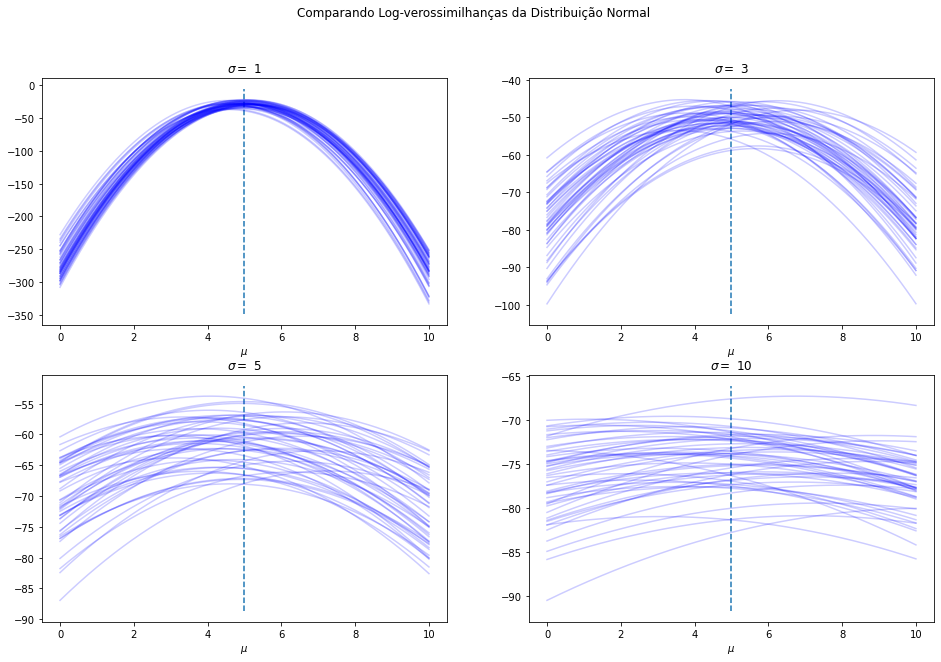

In [107]:
fig,ax = plt.subplots(2,2,figsize = (16, 10))

fig.suptitle('Comparando Log-verossimilhanças da Distribuição Normal')

def generate_curves(sigma, ax, n = 20, n_times = 50): 
    
    for i in range(n_times):

        x = np.random.normal(loc = mu_true, scale = sigma, size = n)
        logvalues = loglikelihood(mu_range, sigma, x)

        ax.plot(mu_range, logvalues, color = 'blue', alpha = 0.2)
        
    ax.vlines(mu_true, ymin = ax.get_ylim()[0], ymax = ax.get_ylim()[1], linestyle = '--')

    ax.set_title(r'$\sigma =$ {}'.format(sigma))
    ax.set_xlabel(r'$\mu$')
    
generate_curves(sigmas[0], ax[0][0])
generate_curves(sigmas[1], ax[0][1])
generate_curves(sigmas[2], ax[1][0])
generate_curves(sigmas[3], ax[1][1])    

4. Vamos ver como se comporta derivada. Esse é o score: 

$$\lambda '_n(y|\mu) = \frac{1}{\sigma^2}\left(n\bar{x}_n - \mu\right)$$

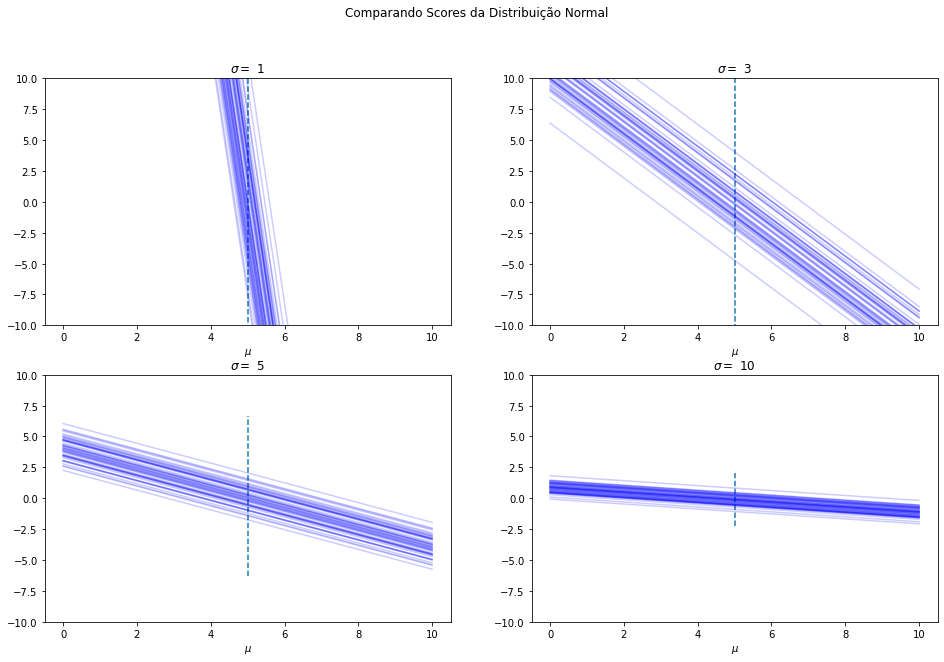

In [119]:
score = lambda mu, sigma, x: derivative(loglikelihood, mu, dx = 1e-5, args = (sigma, x))  

fig,ax = plt.subplots(2,2,figsize = (16, 10))

fig.suptitle('Comparando Scores da Distribuição Normal')

def generate_curves(sigma, ax, n = 20, n_times = 50): 
    
    for i in range(n_times):

        x = np.random.normal(loc = mu_true, scale = sigma, size = n)
        scorevalues = score(mu_range, sigma, x)

        ax.plot(mu_range, scorevalues, color = 'blue', alpha = 0.2)
        
    ax.vlines(mu_true, ymin = ax.get_ylim()[0], ymax = ax.get_ylim()[1], linestyle = '--')

    ax.set_title(r'$\sigma =$ {}'.format(sigma))
    ax.set_xlabel(r'$\mu$')
    
    ax.set_ylim((-10,10))
    
generate_curves(sigmas[0], ax[0][0])
generate_curves(sigmas[1], ax[0][1])
generate_curves(sigmas[2], ax[1][0])
generate_curves(sigmas[3], ax[1][1])    

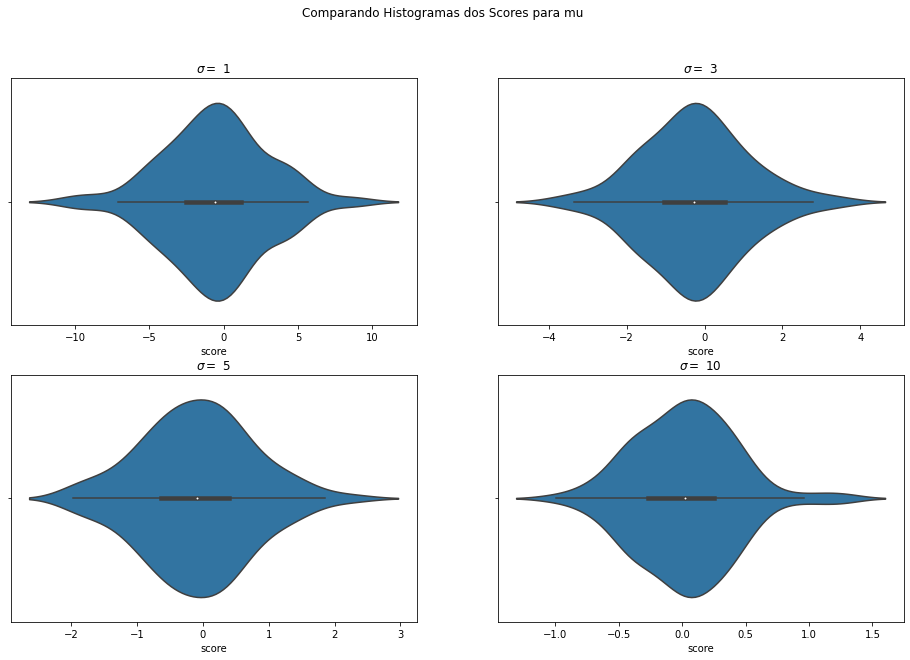

In [124]:
fig,ax = plt.subplots(2,2,figsize = (16, 10))

fig.suptitle('Comparando Histogramas dos Scores para mu')

def generate_histograms(mu, sigma, ax, n = 15, n_times = 100): 
    
    scorevalues = []
    for i in range(n_times):

        x = np.random.normal(loc = mu_true, scale = sigma, size = n)
        scorevalues.append(score(mu, sigma, x))

    violinplot(scorevalues, ax = ax)

    ax.set_title(r'$\sigma =$ {}'.format(sigma))
    ax.set_xlabel('score')
    
generate_histograms(5, sigmas[0], ax[0][0])
generate_histograms(5, sigmas[1], ax[0][1])
generate_histograms(5, sigmas[2], ax[1][0])
generate_histograms(5, sigmas[3], ax[1][1])    

5. A informação de Fisher é a Variância da função score em $X$, isto é: 

$$
\begin{split}
I_n(\mu) &= Var(\lambda '_n(x|p)) = E[(\lambda '_n(x|p))^2] - E[\lambda '_n(x|p)]^2\\ 
&= \frac{1}{\sigma^4}Var\left[n\bar{x}_n - \mu\right] \\
&= \frac{n^2}{\sigma^4}Var(\bar{x}_n) \\
&= \frac{n^2\sigma^2}{n\sigma^4} \\
&= \frac{n}{\sigma^2}
\end{split}
$$

## Desigualdade de Cramér-Rao

Seja $X$ uma amostra aleatória com pdf $f(x| \theta)$. Suponha as hipóteses acima acerca dessa distribuição. Seja $T = r(X)$ com variância finita e $m(\theta) = E_{\theta}(T)$ é diferenciável. Assim:

$$
Var_{\theta}(T) \geq \frac{[m'(\theta)]^2}{nI(\theta)}
$$

A igualdade vale se, e somente se, existem funções $u(\theta)$ e $v(\theta)$ que podem depender em $\theta$ mas não de $X$ tal que: 

$$
T = u(\theta)\lambda_n'(X|\theta) + v(\theta)
$$

Se $T$ for não viesado $m(\theta) = \theta \implies m'(\theta) = 1$

## Exemplo Numérico do limite de Cramér-Rao

[Referência](http://michal.rawlik.pl/2014/02/21/numerical-cramer-rao-bound-in-python/)

Considere um sinal (como uma música) com três parâmetros, amplitude, frequência e fase inicia.

Saberemos o número de amostras que sera 100Hz com nível de ruído de 0.1 

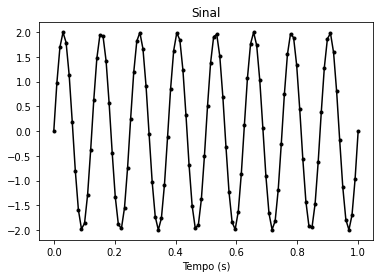

In [2]:
s = lambda t,a,f,ph: a*np.sin(2*np.pi*f*t + ph) # função que representa o sinal

p0 = [2,8,0]     # Amplitude, frequência e fase inicial para testar 
noise = 0.1

T = np.linspace(0,1,100)   #100 valores entre 0 e 1 igualmente espaçados
plt.plot(T, s(T, *p0), '.-k')
plt.xlabel('Tempo (s)')
plt.title('Sinal')
plt.show()

Vamos usar [inspect](https://docs.python.org/3/library/inspect.html) para nos ajudar a pegar labels das funções, isto é, os parâmetros necessários das funções. Essa biblioteca fornece várias funções de ajuda desse tipo. Dê uma olhada. 

In [3]:
parameters = str(inspect.signature(s)).strip('()').replace(' ', '').split(',')[1:]
p0dict = dict(zip(parameters, p0))
p0dict

{'a': 2, 'f': 8, 'ph': 0}

No caso geral, calcular a Matriz de Informação de Fisher não é trivial. Por isso, vamos calcular para o caso em que as medições são de uma amostra com distribuição multivariada normal, isto é, é uma distribuição normal, só que em mais dimensões, em particular, 441 dimensões (número de pontos no tempo)

Se calcularmos a informação de Fisher, podemos ver que:

$$
\mathcal{I}_{mn} = \frac{1}{\sigma^2} \frac{\partial \mu^\mathrm{T}}{\partial \theta_m} \frac{\partial \mu}{\partial \theta_n} = \frac{1}{\sigma^2} \sum_k \frac{\partial \mu_k}{\partial \theta_m} \frac{\partial \mu_k}{\partial \theta_n}
$$

onde $\theta = [a,f,ph]^T$, $\mu = \mu(\theta)$ é o vetor média da normal multivariada e $\sigma^2$ é a variância de cada marginal da normal. Não se assuste. Na multivariada, temos uma matriz para indicar as variâncias (ela se chama Matriz de Covariâncias, na verdade). O que estou dizendo é que ela é $\sigma^2$ vezes a identidade. É bom conhecer essa distribuição!

Por enquando acredite em mim! Ou no [Wikipedia](https://en.wikipedia.org/wiki/Fisher_information#Multivariate_normal_distribution).

Vou chamar $D_{ik} = \frac{\partial \mu_k}{\partial \theta_i}$

In [4]:
# Usamos ** para desempacotar elementos de um dicionário.
string = "a: {a} f: {f} ph: {ph}".format(**p0dict)
print(string)

a: 2 f: 8 ph: 0


In [5]:
D = np.zeros((len(p0), len(T)))

# para cada parâmetro
for i, parameter in enumerate(parameters):
    # para cada ponto no tempo
    for k, t in enumerate(T):
         
        func = lambda x: s(t, **dict(p0dict, **{parameter: x}))
        # Calculamos a derivada com respeito a x, que nesse caso é o valor do parametro
        D[i,k] = derivative(func, p0dict[parameter], dx = 1e-4)   

Veja que o tamanho de D é o seguinte:

In [6]:
D.shape

(3, 100)

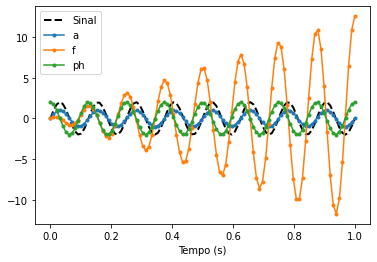

In [7]:
plt.plot(T, s(T, *p0), '--k', lw=2, label='Sinal')

for Di, parameter in zip(D, parameters):
    # Estamos acessando Di = linha_i(D)
    plt.plot(T, Di, '.-', label=parameter)
    
plt.legend()
plt.xlabel('Tempo (s)')
plt.show()

O que $D_{ik}$ indica? É a derivada da $k-ésima$ média com respeito ao i-ésimo parâmetro. Logo indica o quanto o quando a amostra $k$ afeta o parâmetro $i$. Veja que quando temos picos no seno, teremos pico na amplitude,. Também vemos que a fase inicial não tem essa relevância. Vemos também que o sinal se torna mais e mais sensível à frequência. 

Assim, podemos calular a informação de fisher, usando [einsum](https://numpy.org/doc/stable/reference/generated/numpy.einsum.html)

In [8]:
I = 1/noise**2*np.einsum('mk,nk', D, D)
print(I)

[[ 4.95000000e+03 -5.64643569e+02 -3.43706036e-09]
 [-5.64643569e+02  2.68635205e+05  6.34601694e+04]
 [-3.43706036e-09  6.34601694e+04  2.01999999e+04]]


Podemos calcular o limite de Cramér-Rao para qualquer estimador não enviesado. Nesse caso, veja [aqui](https://en.wikipedia.org/wiki/Cram%C3%A9r%E2%80%93Rao_bound#Multivariate_case) para mais detalhes. Mas não se incomode com os detalhes, se preferir. 

In [9]:
iI = np.linalg.inv(I)  

print('Cramér-Rao Limite Inferior')
for parameter, variance in zip(parameters, iI.diagonal()):
    print('{}: {:.2g}'.format(parameter, np.sqrt(variance)))

Cramér-Rao Limite Inferior
a: 0.014
f: 0.0038
ph: 0.014


## Estimador Eficiente

$T$ é um estimador eficiente de sua esperança $m(\theta)$ se, para todo $\theta$, vale a igualdade em Cramér-Rao.

Mas nem sempre vale a igualdade, inclusive conhecemos uma consdição necessária e suficiente para isso, que está logo acima. 

## Estimadores não viesados com variância mínima 

Suponha que $T$ seja um estimador eficiente de sua esperança $m(\theta)$ e $T_1$ outro estimador não enviesado. Então para todo valor $\theta \in \Omega$, $Var_{\theta}(T)$ será igual ao limite inferior de Cramér-Rao e $Var_{\theta}(T_1)$ será pelo menos maior ou igual. Portanto $Var_{\theta}(T) \leq Var_{\theta}(T_1), \forall \theta$. Isto é, um estimado eficiente de $m(\theta)$ terá menor variância. 

### Distribuição assintótica de um estimador eficiente 

Assuma as hipóteses do teorema de Cramér-Rao. Seja $T$ um estimador eficiente para a sua média $m(\theta)$ e $m'(\theta) \neq 0$. Então: 

$$
\frac{[nI(\theta)]^{1/2}}{m'(\theta)}[T - m(\theta)] \overset{d}{\to} N(0,1)
$$

### Distribuição assintótica do MLE

Suponha que obtemos $\hat{\theta}_n$ resolvendo a equação $\lambda_n'(x|\theta) = 0$, isto é, maximizando a log-verossimilhança (MLE). E suponha que $\lambda_n''$ e $\lambda_n'''$ existem e satisfazem certas condições de regularidade. Então 

$$
[nI(\theta)]^{1/2}(\hat{\theta}_n - \theta) \overset{d}{\to} N(0,1)
$$

Como o MLE é não viesado, então se ele for Eficiente, já sabemos que esse teorema é verdade pelo anterior. (se ele é não viesado)

### Bayesiano 

Suponha que adotamos uma priori para $\theta$ com uma pdf diferenciável no intervalo. Sobre condições de regularidade similares àquelas que garantem normalidade assintótica para $\hat{\theta}_n$, pode-se mostrar que que a distribuição a posteriori de $\theta$ vai se aproximadamente uma normal com média $\hat{\theta}_n$ e variância $1/[nI(\hat{\theta}_n)]$, onde $\hat{\theta}_n$ é o MLE. 